## Summary 

## Contents: The dataset contains information about 15 houses sold in the state of Washington, USA, on May 2, 2014.
## Features: It includes 21 features describing each house:
## Date of sale
## Number of bedrooms and bathrooms
## Square footage of living space, lot, above-ground area, and basement
## Number of floors
## Whether the house has waterfront access or a view
## Overall condition of the house
## Year built and year renovated (if applicable)
## Street address, city, state/ZIP code, and country
## Sale price


## Feature	Description
## date :	Date the house was sold (5/2/2014 for all houses in this sample)
## bedrooms :	Number of bedrooms in the house
## bathrooms:	Number of bathrooms in the house
## sqft_living	:Square footage of living space
## sqft_lot :	Square footage of the lot (land area)
## floors:	Number of floors in the house
## waterfront	:0 if no waterfront access, 1 if waterfront access
## view	 :0 if no view, 1-4 for different levels of view quality
## condition	: Overall condition of the house (likely a numerical rating)
## sqft_above	:Square footage of the house above ground
## sqft_basement	 :Square footage of basement space
## yr_built	 :Year the house was built
## yr_renovated	 :Year the house was renovated (if applicable)
## street	:Street address of the house
## city	 : City where the house is located
## statezip :	State and ZIP code of the house
## country	 :Country (USA for all houses in this sample)
## price:	Sale price of the house


## Main Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#shuffle
from sklearn.utils import shuffle 

from sklearn.metrics import mean_squared_error
#preprocessing
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict , GridSearchCV  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , StandardScaler

#pipeline
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector

#ensemble
from sklearn.ensemble import RandomForestRegressor


import xgboost as xgb

In [2]:
# load datasest 
df = pd.read_csv(r"D:\ML_data\data.csv")
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,5/2/2014 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,313000.0
1,5/2/2014 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2384000.0
2,5/2/2014 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,342000.0
3,5/2/2014 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,420000.0
4,5/2/2014 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,550000.0


In [3]:
## detials of datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  price          4600 non-null   float64
dtypes: float

In [4]:
## feartues numerical
features_num = df._get_numeric_data()
features_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05
4596,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05
4597,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05
4598,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05


In [5]:
# Show some statistcs
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0
sqft_basement,4600.0,312.081522,464.137228,0.0,0.00,0.00000,610.00,4820.0


## number of nunique all features 

In [6]:
df.nunique()

date               70
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
price            1741
dtype: int64

## Your Features 

In [7]:
output =  "price"
for i in df.columns:
    if i == output:
        continue
    print(i)

date
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
sqft_above
sqft_basement
yr_built
yr_renovated
street
city
statezip
country


## Shape 

In [8]:
df.shape

(4600, 18)

## check Null

In [9]:
df.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
price            0
dtype: int64

# comment : Not found Null in the your datasest

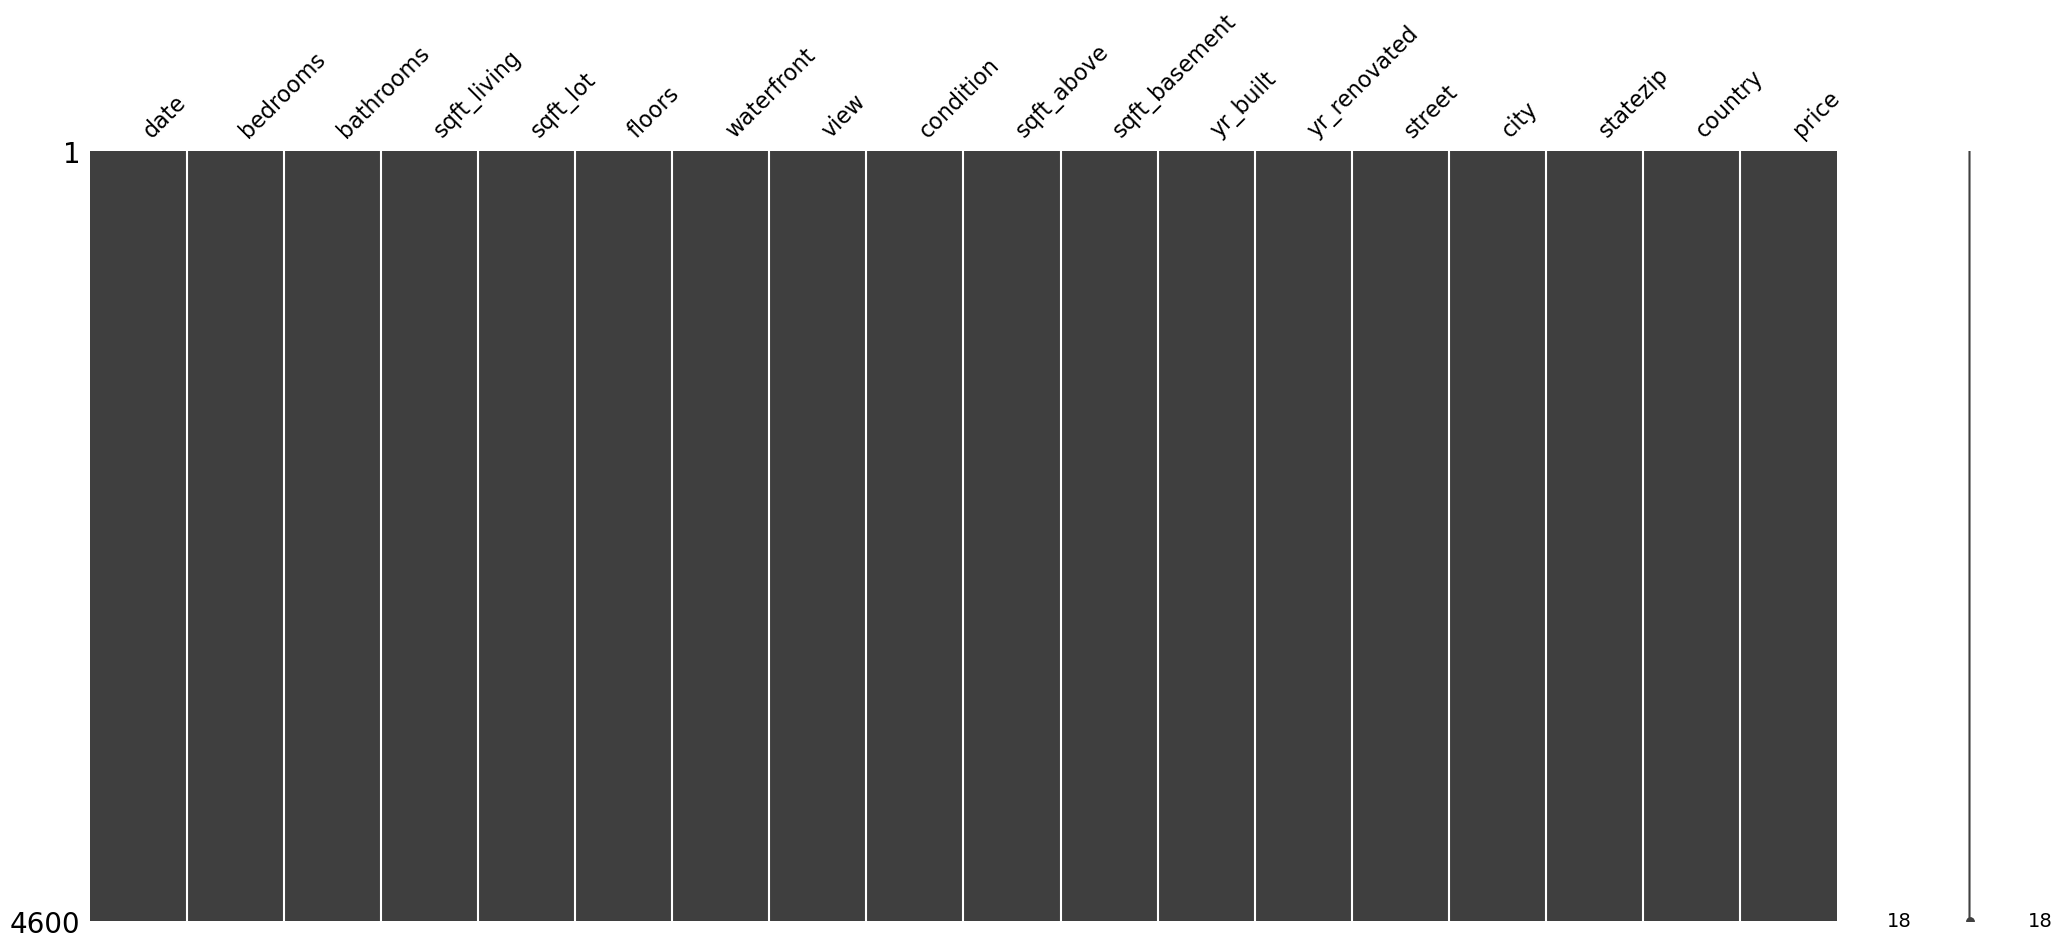

In [10]:
mis.matrix(df)
plt.show()

In [11]:
df['floors'].value_counts().to_frame()

,floors
1.0,2174
2.0,1811
1.5,444
3.0,128
2.5,41
3.5,2


In [12]:
(df['condition'].value_counts().to_frame())


,condition
3,2875
4,1252
5,435
2,32
1,6


## ckeck duplicated

In [13]:
df.duplicated().sum()

0

## Data Pre -processing 

## Ckeck numerical and categorical features 

In [14]:
numeric_cols = [col for col in df.columns if df[col].dtype in  ["int32" , "int64" , "float32" , "float64"]]
categorical_cols = [col for col in df.columns if df[col].dtype not in ["int32" , "int64" , "float32" , "float64"]]
    
if (numeric_cols) and (categorical_cols):
        print(f"the numeric columns is\n ==> {pd.DataFrame(numeric_cols)}")
        print(f"the categorical columns is \n==> {pd.DataFrame(categorical_cols)}")
        
elif categorical_cols:
        print(f"the categorical columns is\n ==> {pd.DataFrame(categorical_cols)}")
    
else:
        print(f"the numeric columns is\n ==> {pd.DataFrame(numeric_cols)}")

the numeric columns is
 ==>                 0
0        bedrooms
1       bathrooms
2     sqft_living
3        sqft_lot
4          floors
5      waterfront
6            view
7       condition
8      sqft_above
9   sqft_basement
10       yr_built
11   yr_renovated
12          price
the categorical columns is 
==>           0
0      date
1    street
2      city
3  statezip
4   country


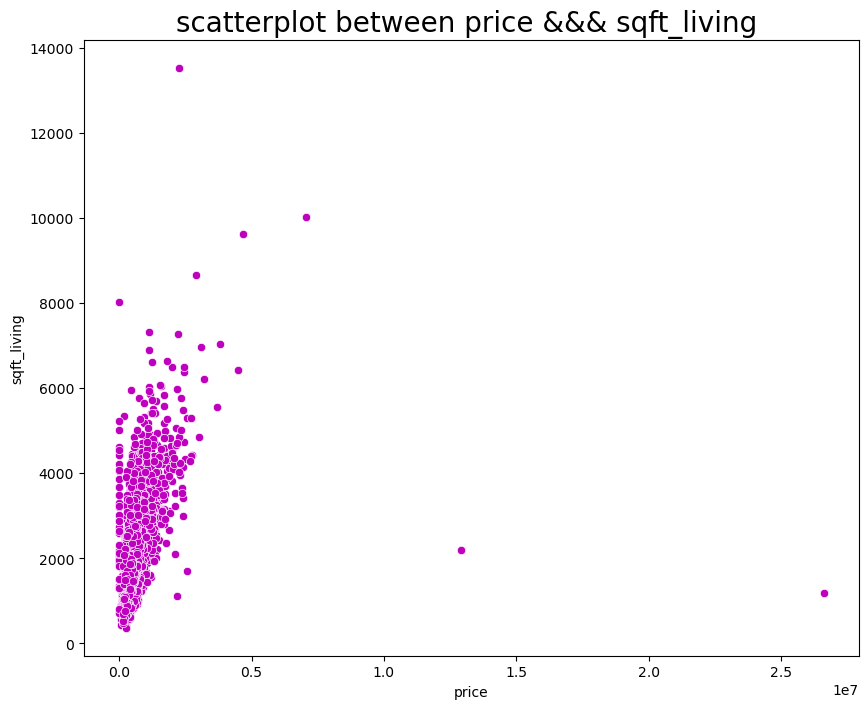

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='sqft_living',data=df , color="m")
plt.xlabel("price")
plt.ylabel("sqft_living")
plt.title("scatterplot between price &&& sqft_living " , fontsize=20)
plt.show()

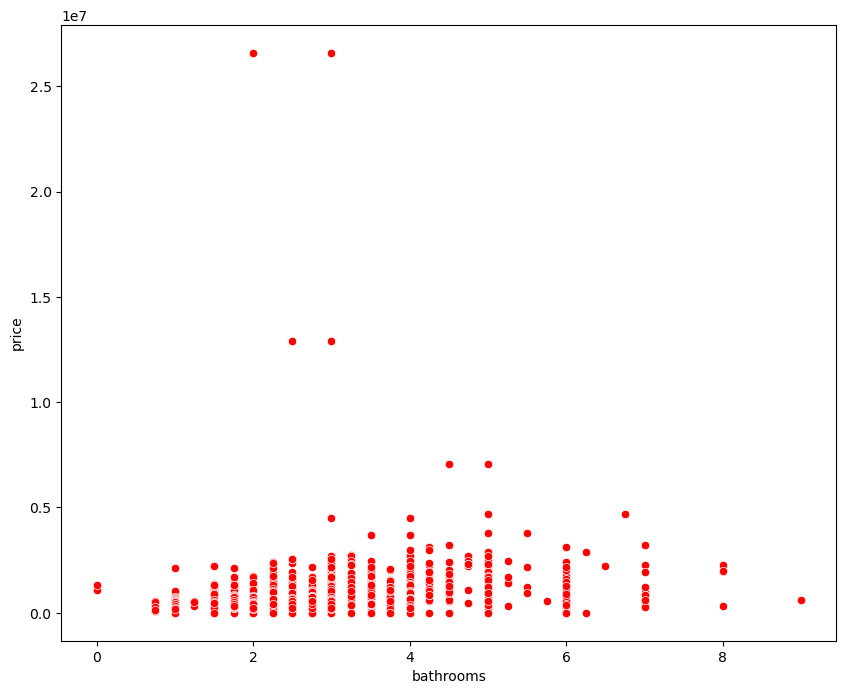

In [16]:
#scatter between (bathrooms , bedrooms)
plt.figure(figsize=(10,8))

data = ["bathrooms", "bedrooms"]

for column in data:
    sns.scatterplot(data=df, x=column, y=df["price"], color="r")

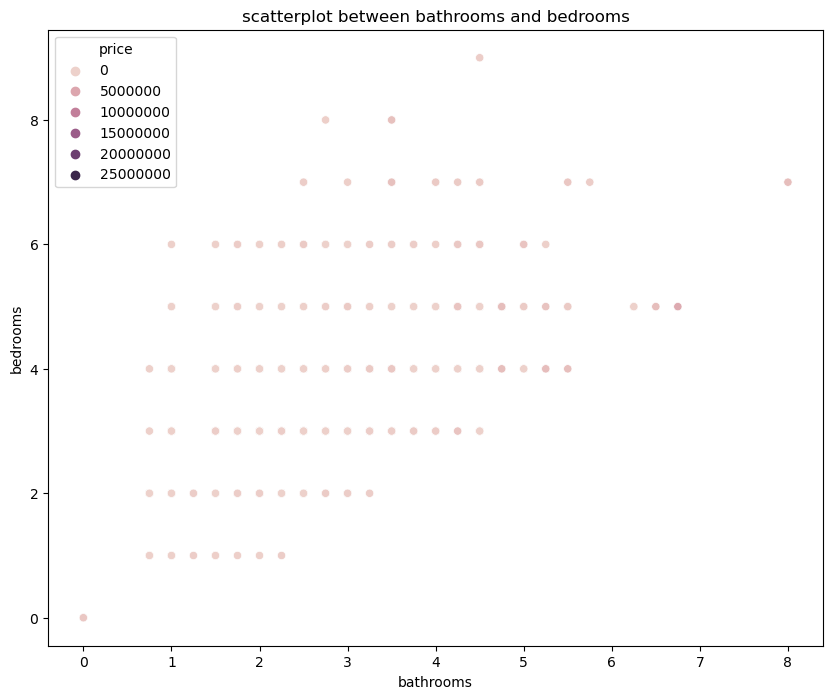

In [17]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df , x=df["bathrooms"] , y=df["bedrooms"] , hue=df["price"])
plt.xlabel("bathrooms")
plt.ylabel("bedrooms")
plt.title("scatterplot between bathrooms and bedrooms")
plt.show()

In [18]:
df["waterfront"].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

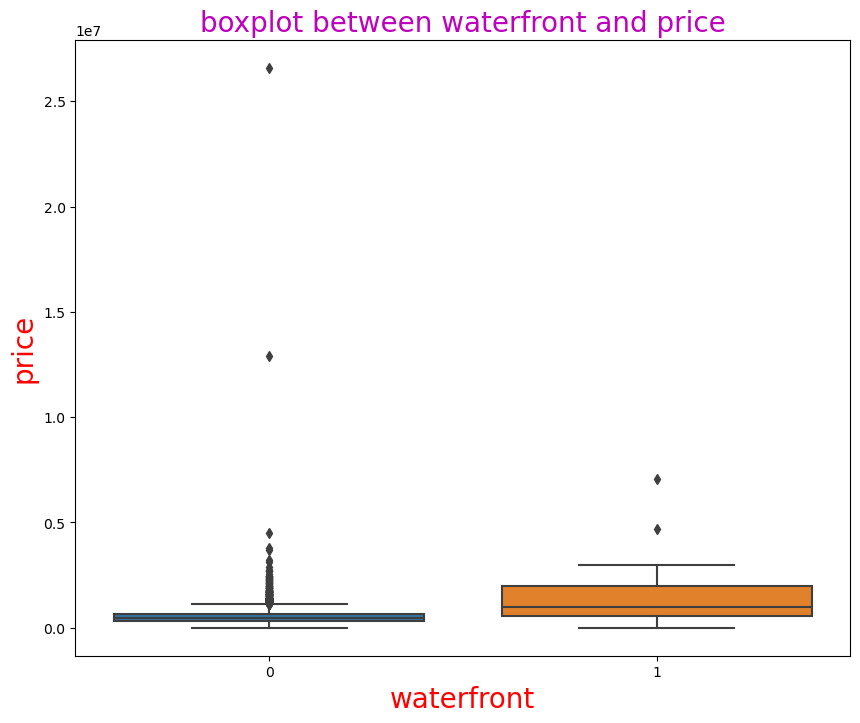

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("boxplot between waterfront and price" , fontsize=20 , color="m")
plt.xlabel("waterfront" ,  fontsize=20 , color="r")
plt.ylabel("price" ,  fontsize=20 , color="r")
plt.show()

<Figure size 1000x800 with 0 Axes>

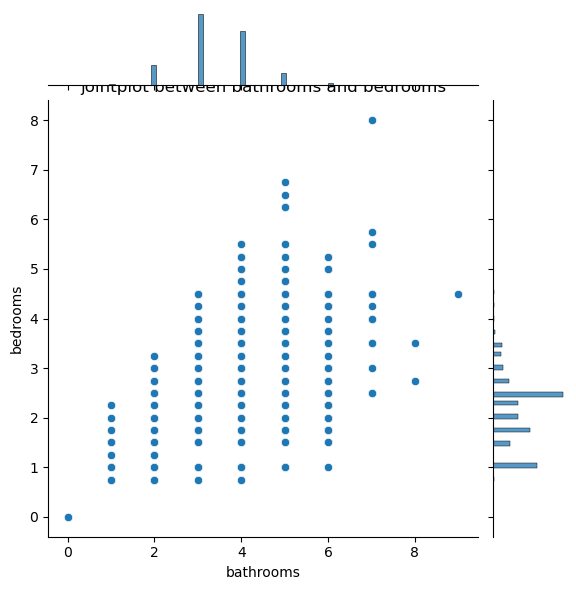

In [20]:
plt.figure(figsize=(10,8))
sns.jointplot(data=df , x=df["bedrooms"] , y=df["bathrooms"])
plt.xlabel("bathrooms")
plt.ylabel("bedrooms")
plt.title("jointplot between bathrooms and bedrooms")
plt.show()

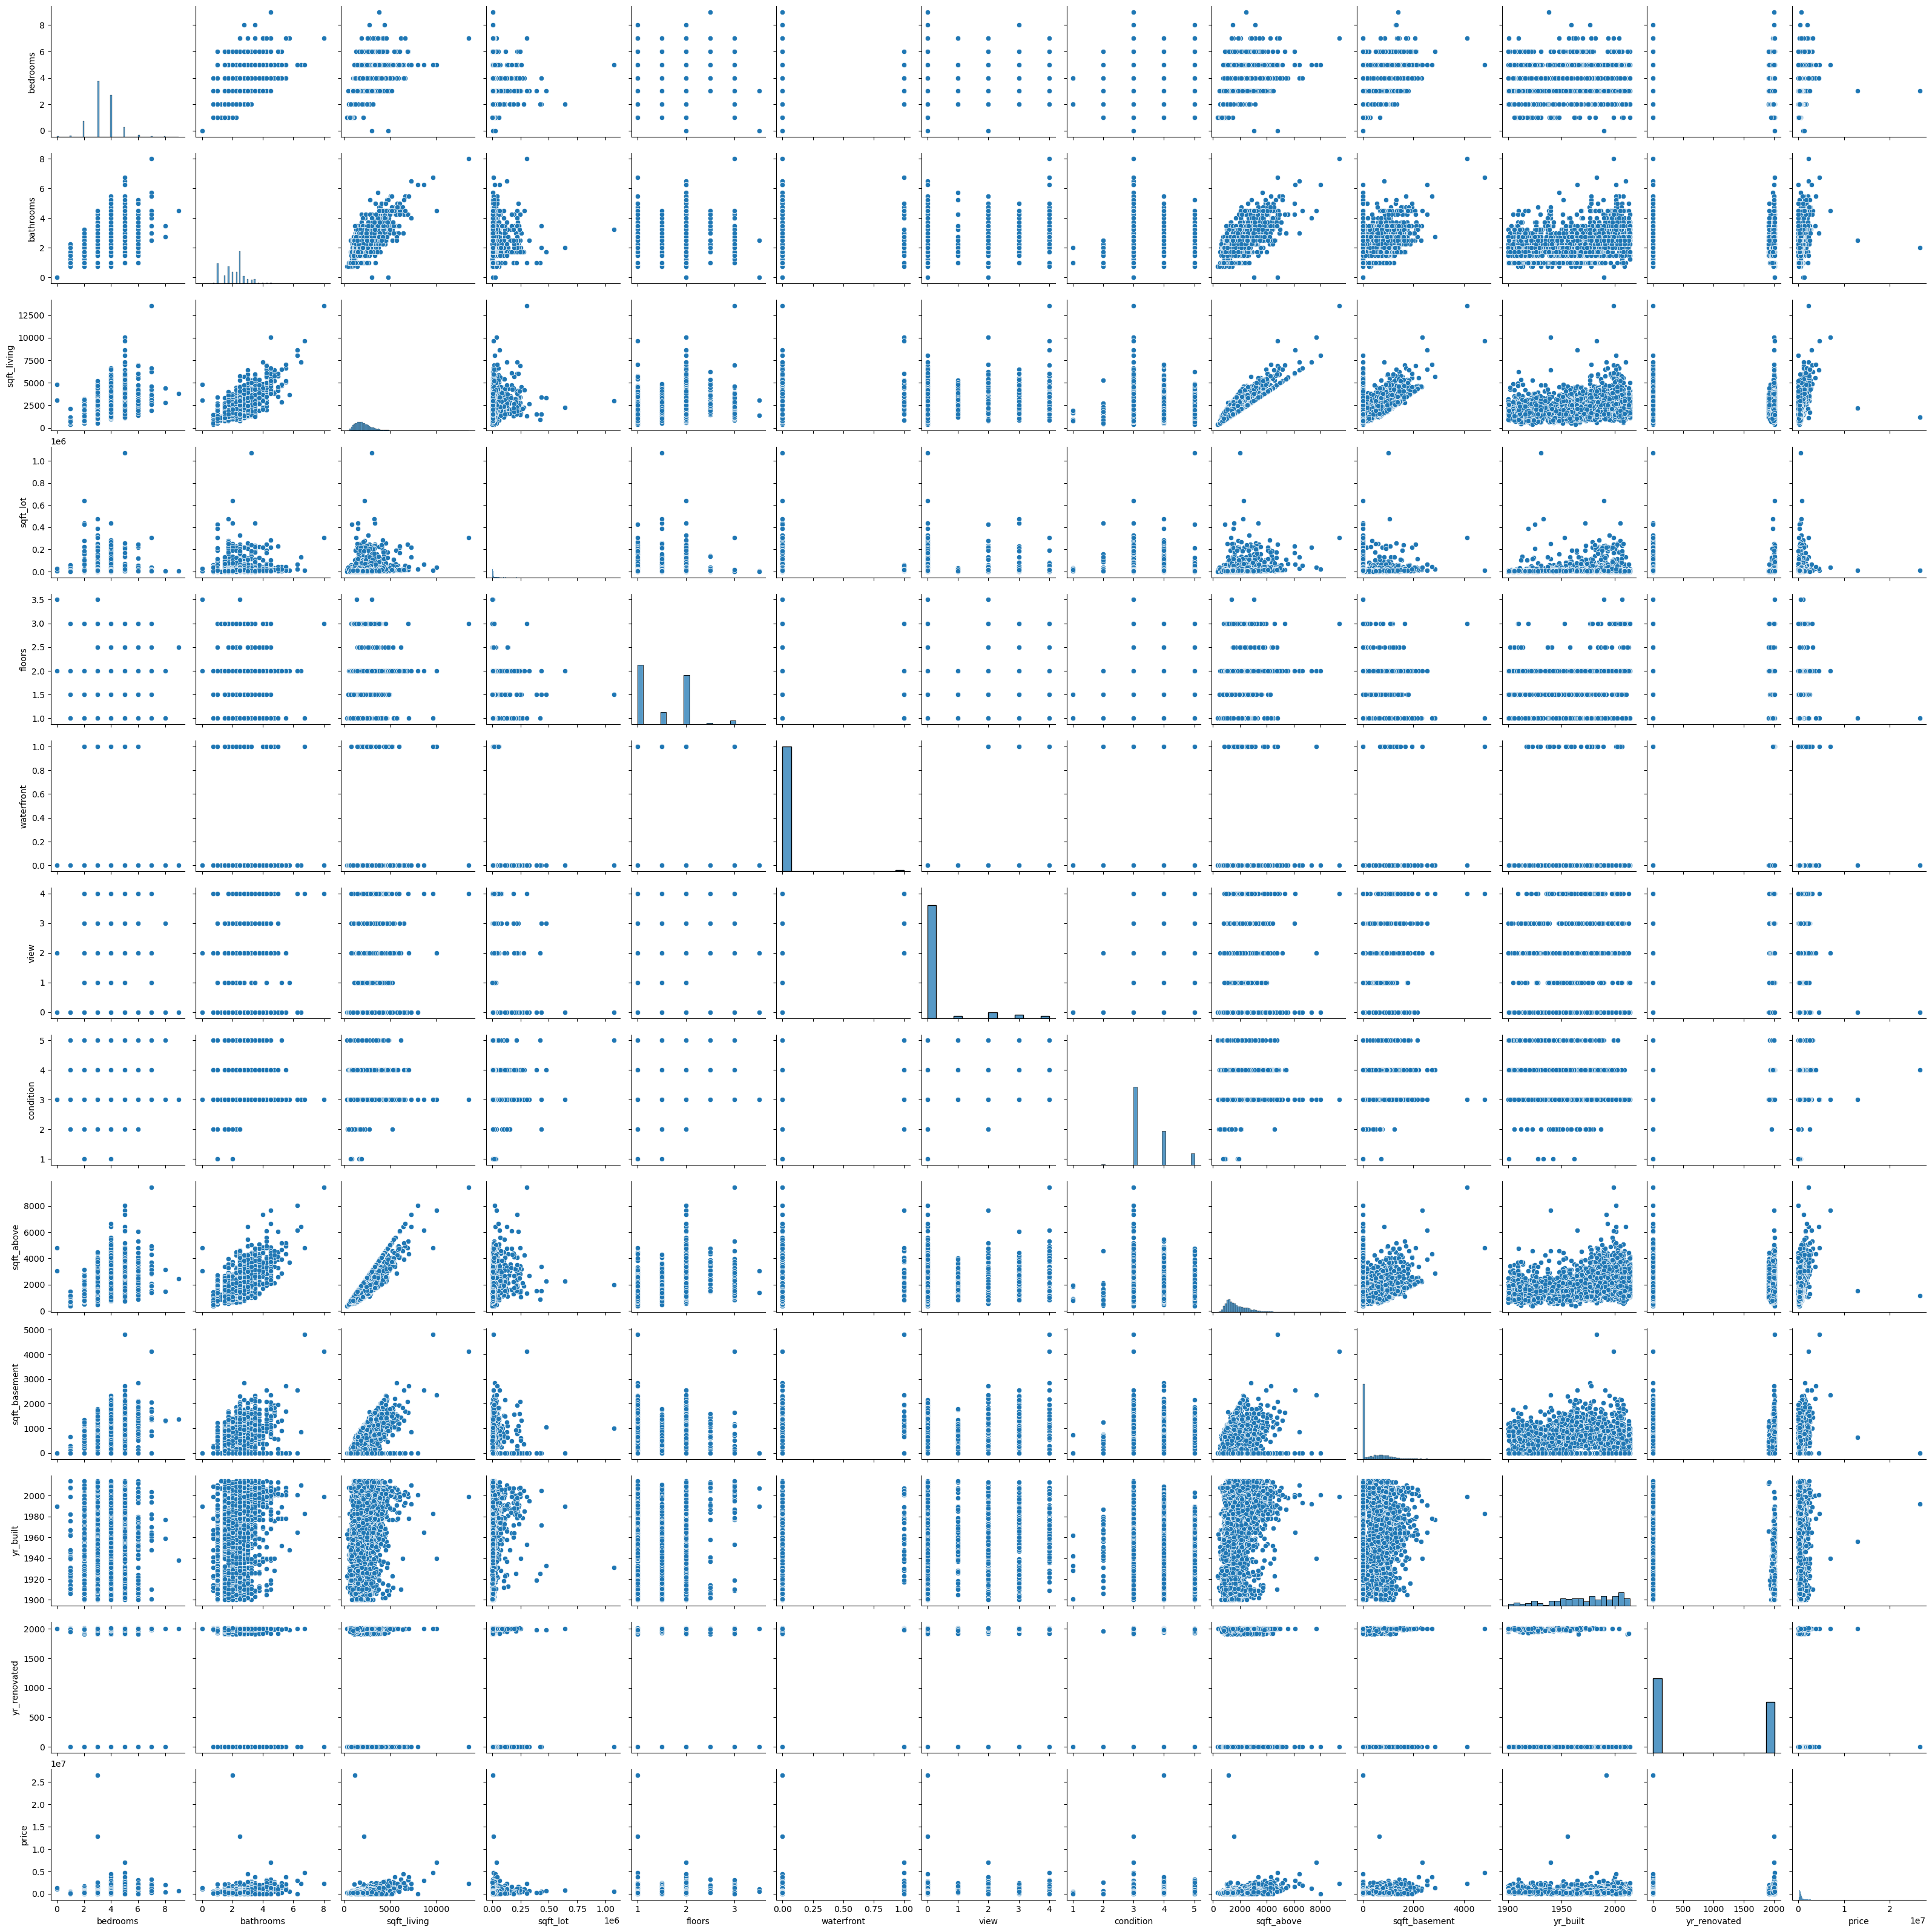

In [21]:
sns.pairplot(df)
plt.show()

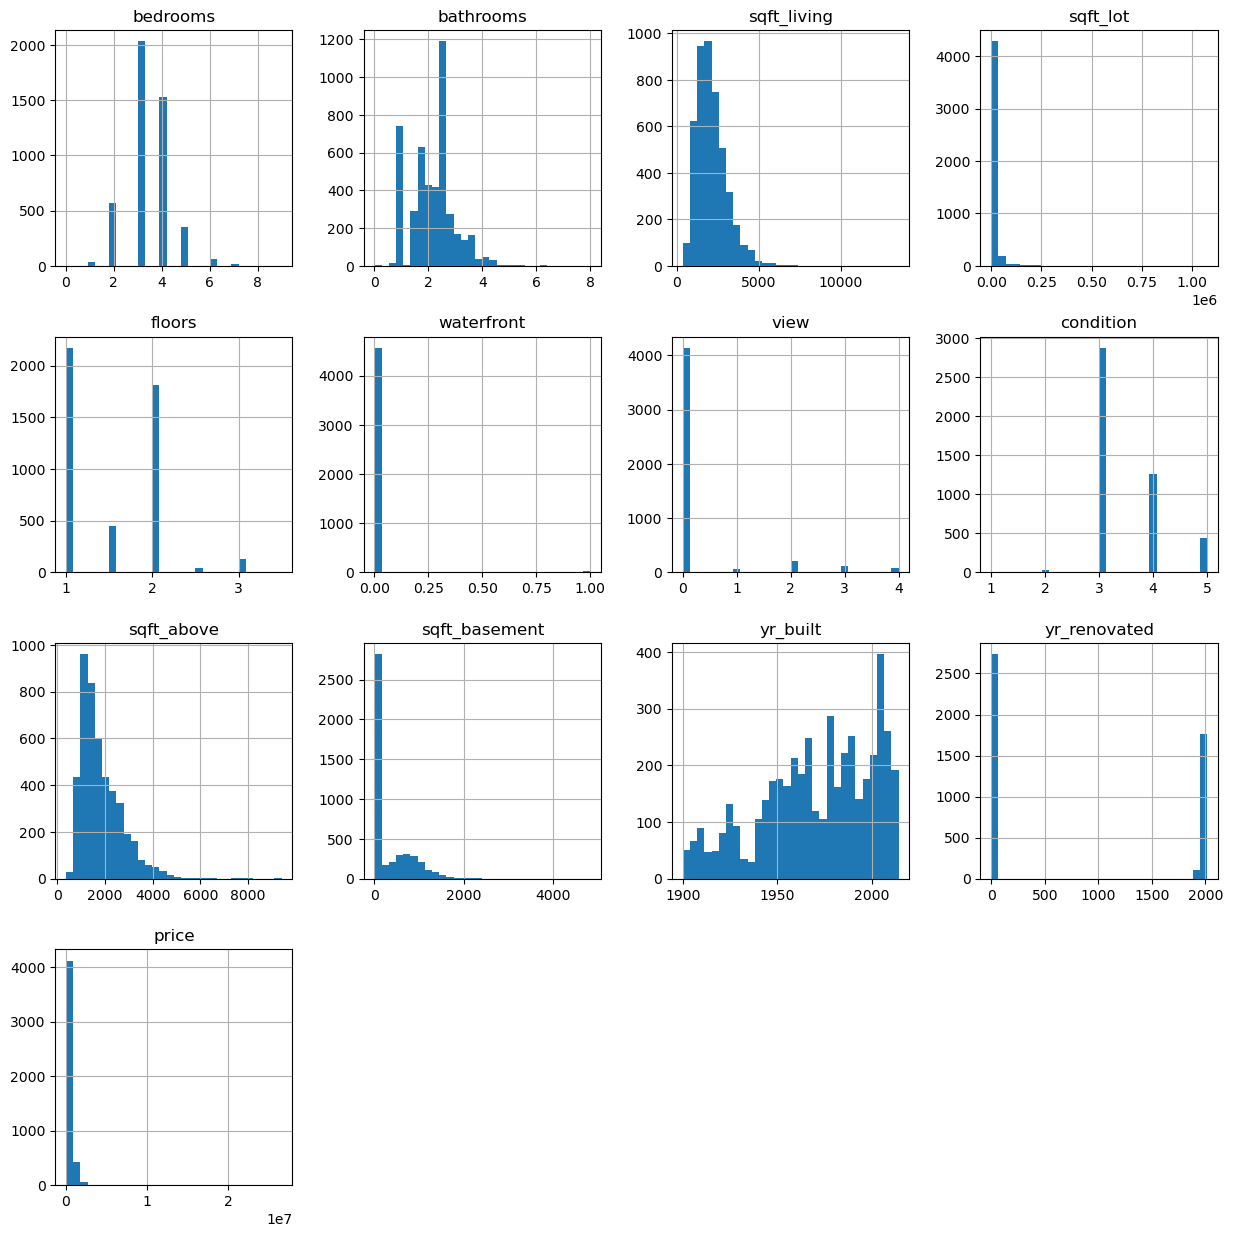

In [23]:
df.hist(bins=30 , figsize=(15,15))
plt.show()

In [24]:
pd.DataFrame(df.skew())

,0
bedrooms,0.456447
bathrooms,0.616033
sqft_living,1.723513
sqft_lot,11.307139
floors,0.551441
waterfront,11.682901
view,3.341586
condition,0.959068
sqft_above,1.494211
sqft_basement,1.642732


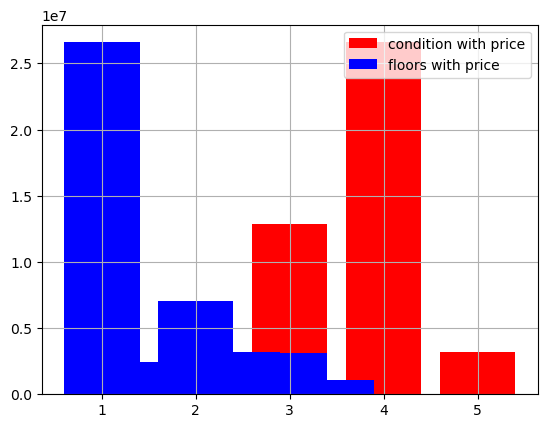

In [25]:
plt.bar(df["condition"] , df["price"] ,color="r" , label = "condition with price")
plt.bar(df["floors"] , df["price"],color="b" , label = "floors with price")
plt.legend()
plt.grid(True)
plt.show()

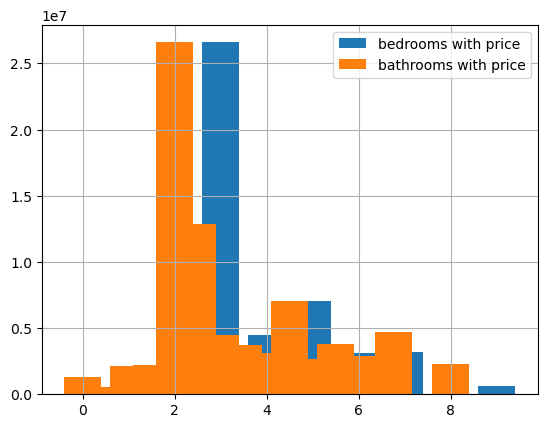

In [26]:
plt.bar(df["bedrooms"] , df["price"] , label = "bedrooms with price")
plt.bar(df["bathrooms"] , df["price"] , label = "bathrooms with price")
plt.style.use("seaborn-muted")
plt.legend()
plt.grid(True)
plt.show()

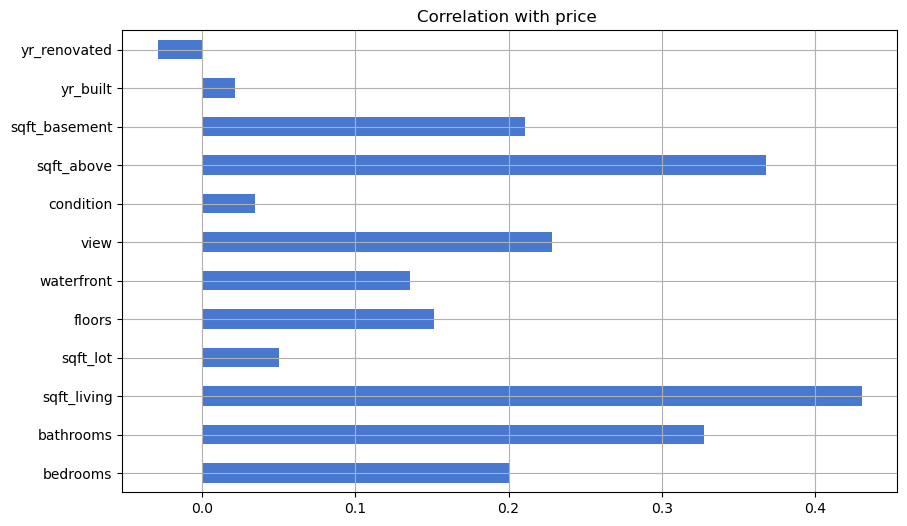

In [27]:
## Correlation all features with price  
df.drop('price',axis=1).corrwith(df.price).plot(kind='barh',grid=True,figsize=(10,6),title="Correlation with price ")
plt.show()

### plot all features

<Axes: >

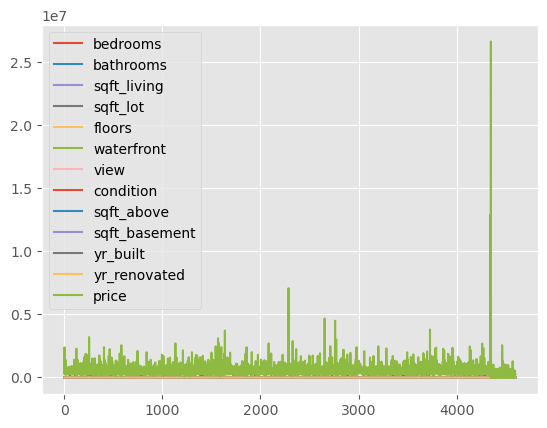

In [28]:
plt.style.use('ggplot')
df.plot()

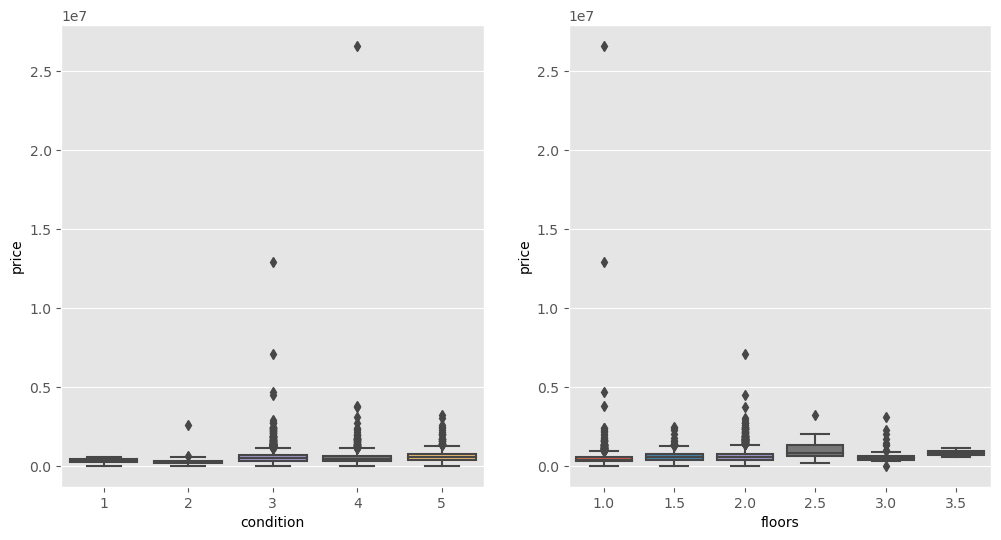

In [29]:
plt.figure(figsize=[12, 6])

plt.subplot(121)
sns.boxplot(x=df["condition"], y=df["price"], data=df);

plt.subplot(122)
sns.boxplot(x=df["floors"], y=df["price"], data=df)

plt.show()

In [30]:
df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
bedrooms,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,0.200336
bathrooms,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.327110
sqft_living,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.430410
sqft_lot,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,0.050451
floors,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,0.151461
waterfront,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.135648
view,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.228504
condition,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,0.034915
sqft_above,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,0.367570
sqft_basement,0.334165,0.298020,0.447206,0.034842,-0.255510,0.097501,0.321602,0.200632,-0.038723,1.000000,-0.161675,0.043125,0.210427


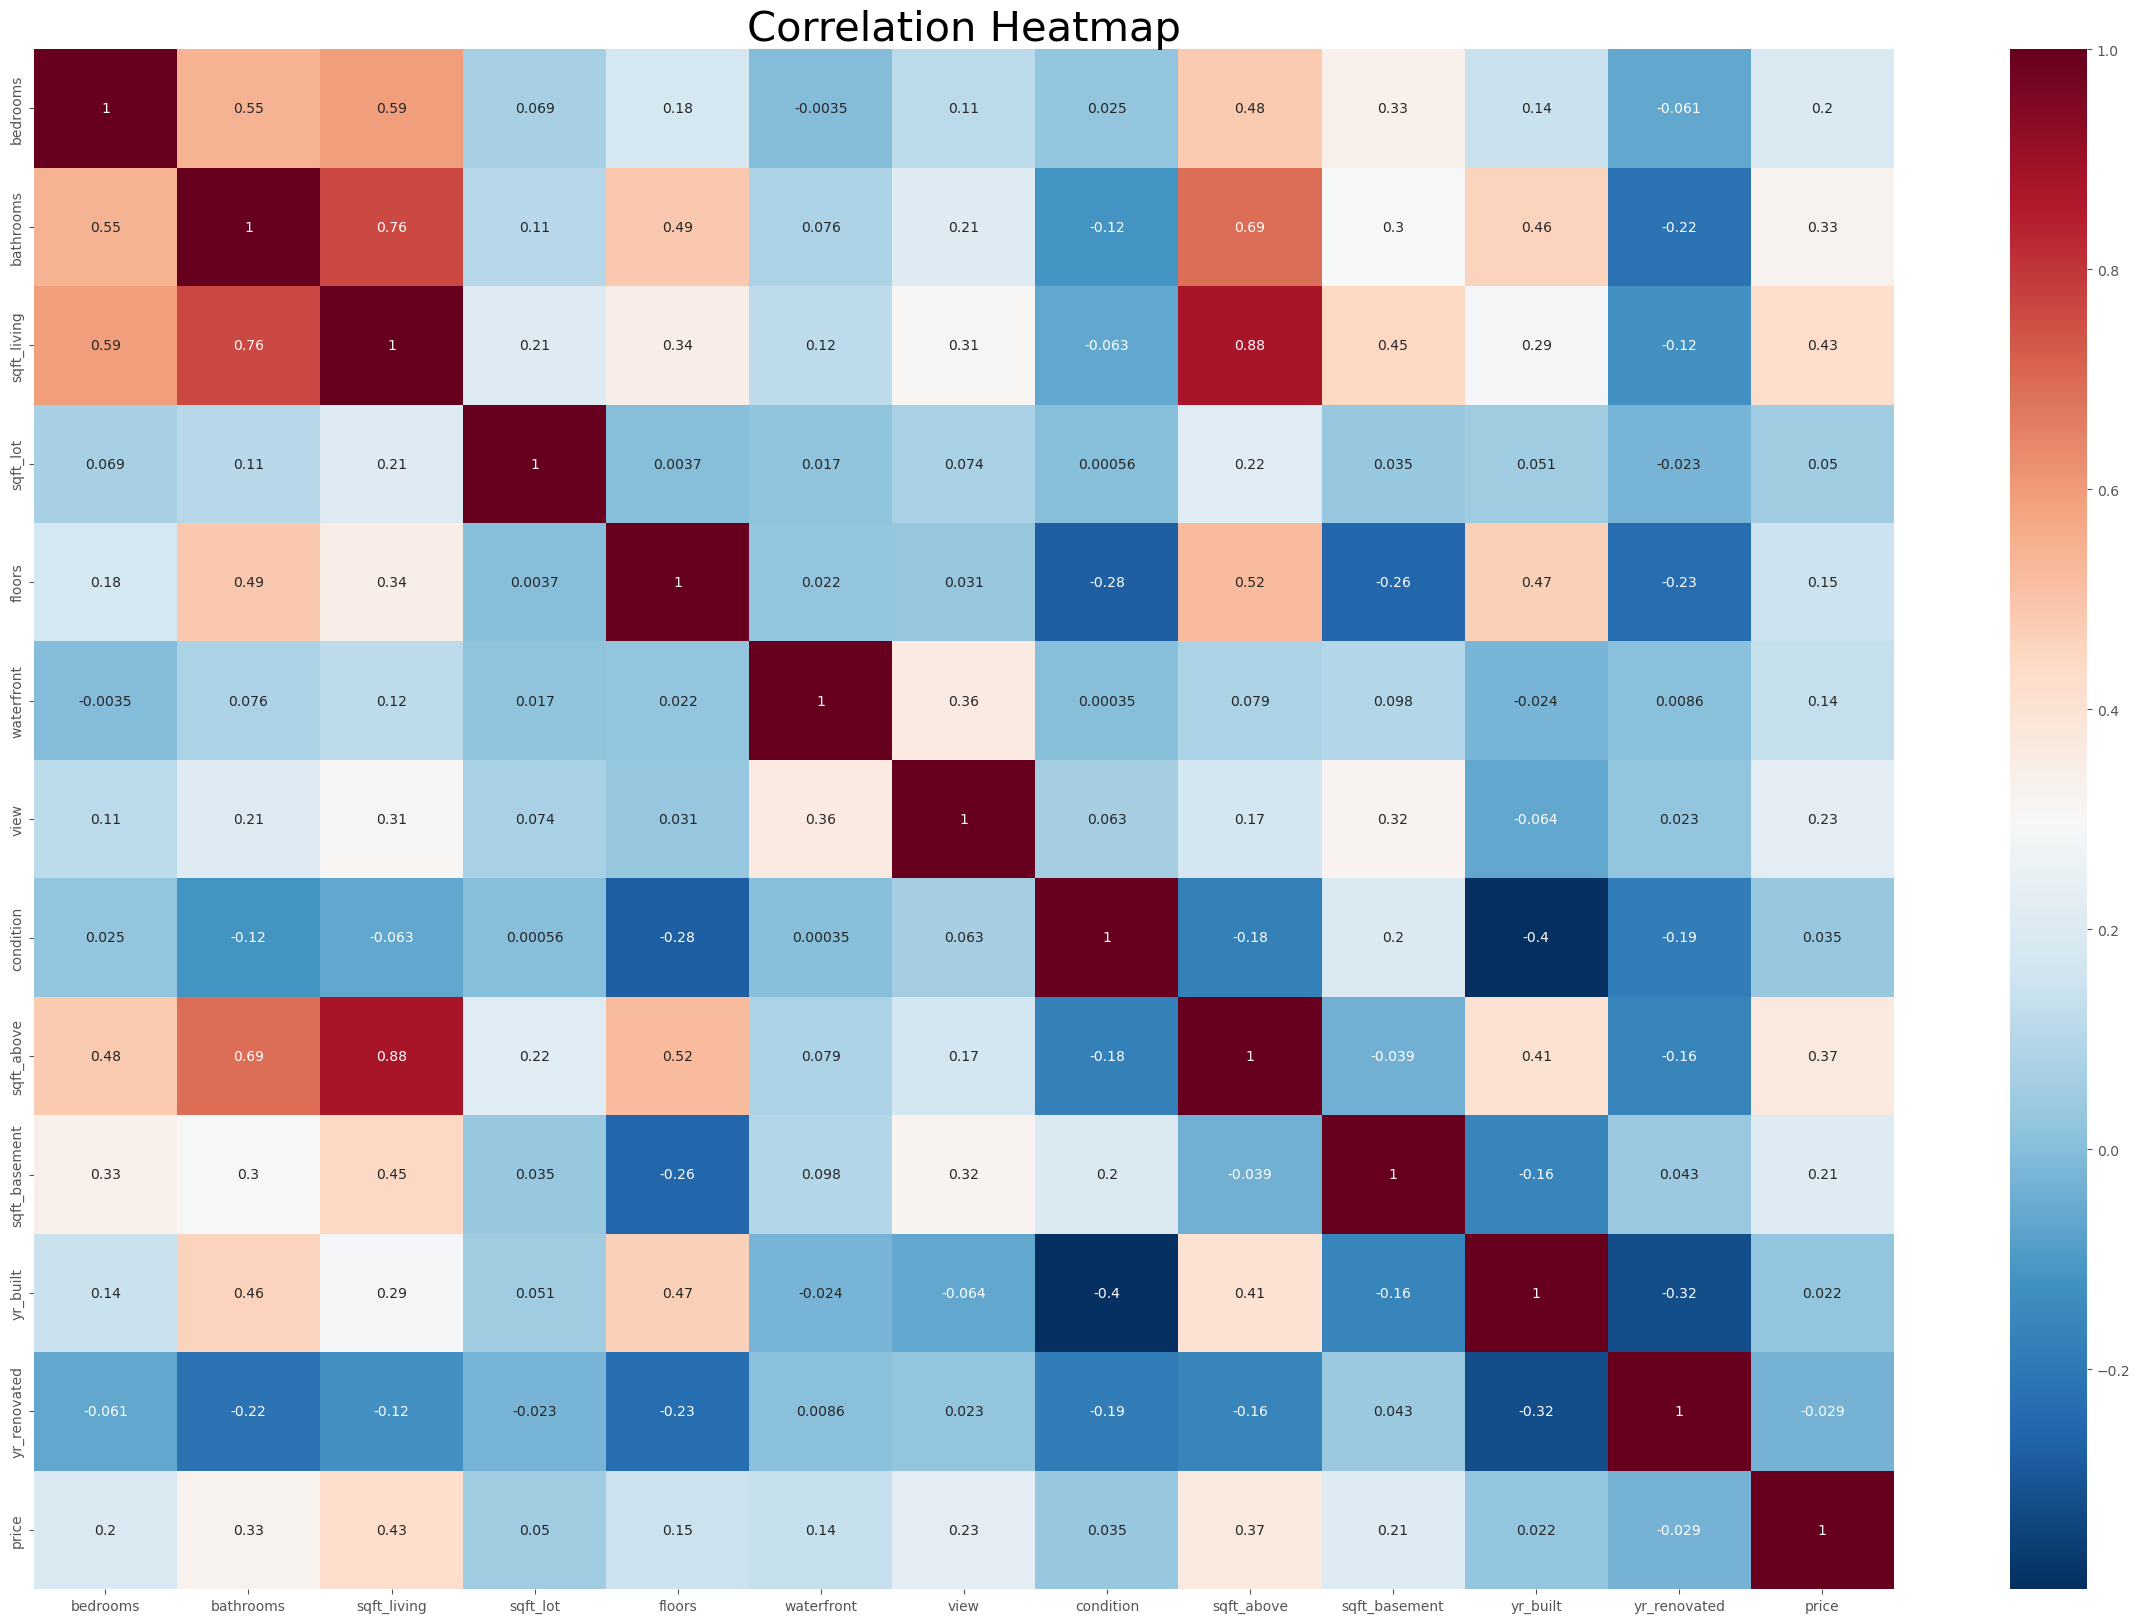

In [31]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr() , annot=True  , cbar=True , linecolor='black', cmap='RdBu_r')
plt.title("Correlation Heatmap" , fontsize=30 )
plt.show()

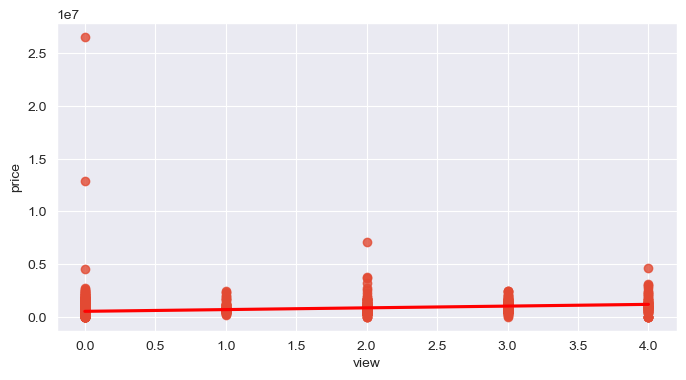

In [32]:
plt.figure(figsize=(8, 4))

sns.set_style("darkgrid")

sns.regplot(data=df, x='view', y='price', line_kws={'color': 'r'})

plt.show()


## scatter plot with a fitted regression line to visualize the relationship between two variables. It's useful for exploring linear relationships and identifying potential correlations.

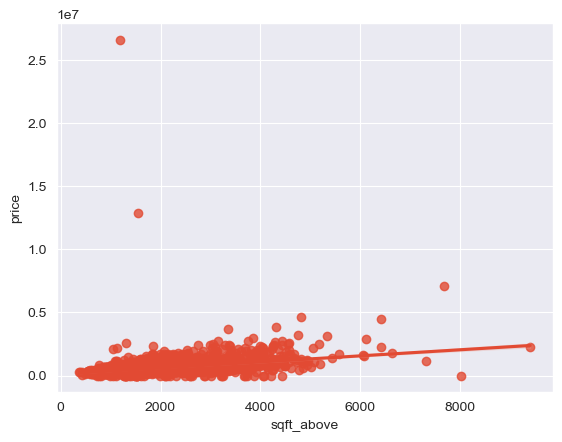

In [33]:
sns.regplot(x = "sqft_above", y = "price", data = df)
plt.show()

In [34]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,5/2/2014 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,3.130000e+05
1,5/2/2014 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2.384000e+06
2,5/2/2014 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,3.420000e+05
3,5/2/2014 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,4.200000e+05
4,5/2/2014 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,3.081667e+05
4596,7/9/2014 0:00,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,5.343333e+05
4597,7/9/2014 0:00,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,4.169042e+05
4598,7/10/2014 0:00,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2.034000e+05


## Feature Engineering

In [35]:
df["Total_Rooms"] = df["bedrooms"] + df["bathrooms"]

In [36]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price,Total_Rooms
0,5/2/2014 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,3.130000e+05,4.50
1,5/2/2014 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2.384000e+06,7.50
2,5/2/2014 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,3.420000e+05,5.00
3,5/2/2014 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,4.200000e+05,5.25
4,5/2/2014 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5.500000e+05,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,3.081667e+05,4.75
4596,7/9/2014 0:00,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,5.343333e+05,5.50
4597,7/9/2014 0:00,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,4.169042e+05,5.50
4598,7/10/2014 0:00,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2.034000e+05,6.00


In [37]:
num = [col for col in df.columns if df[col].dtype in ["int32" , "int64" , "float32" , "float64"]]
num

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'price',
 'Total_Rooms']

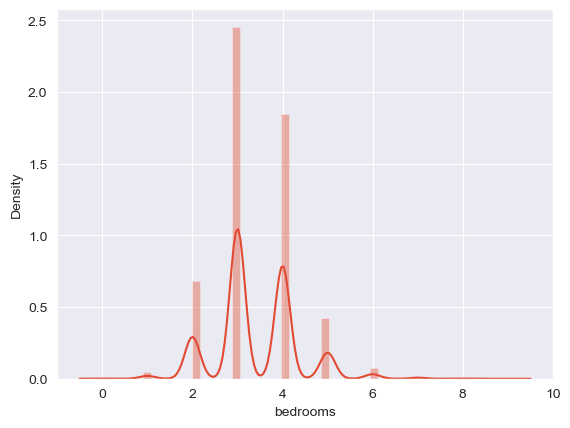

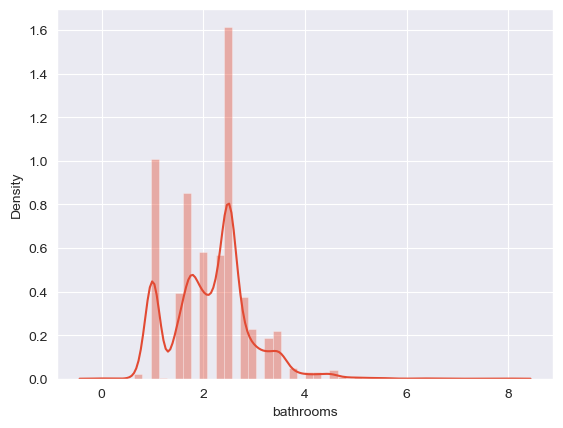

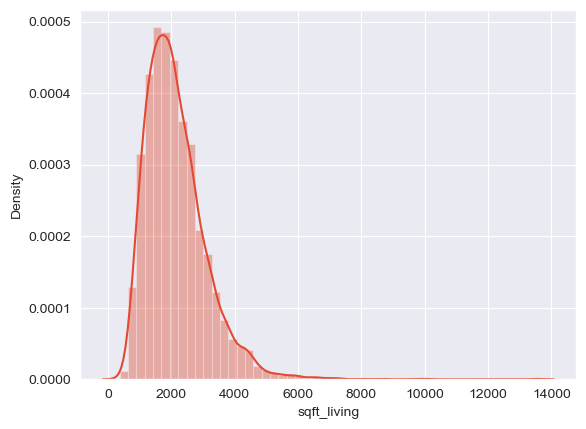

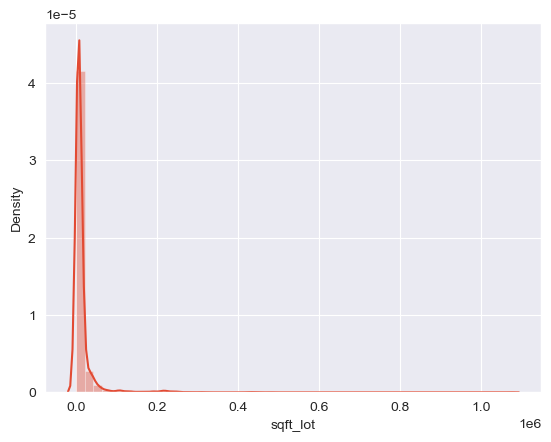

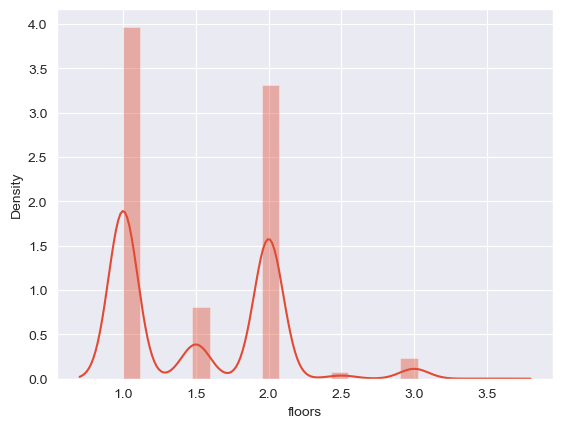

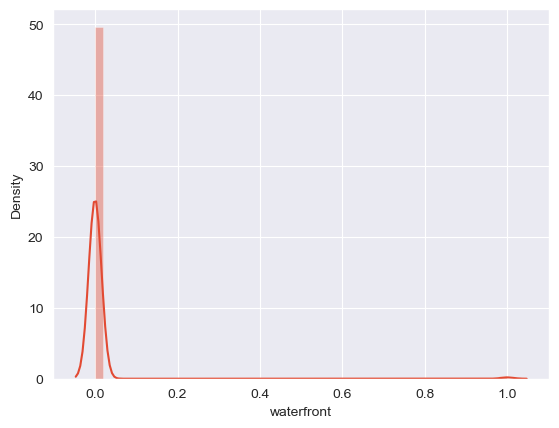

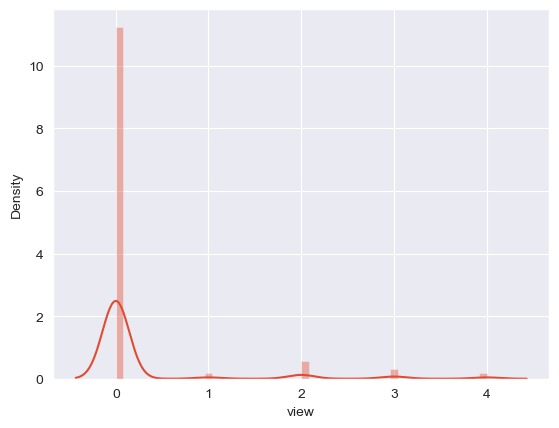

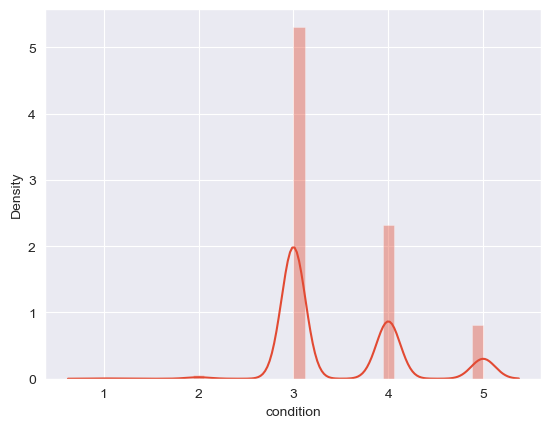

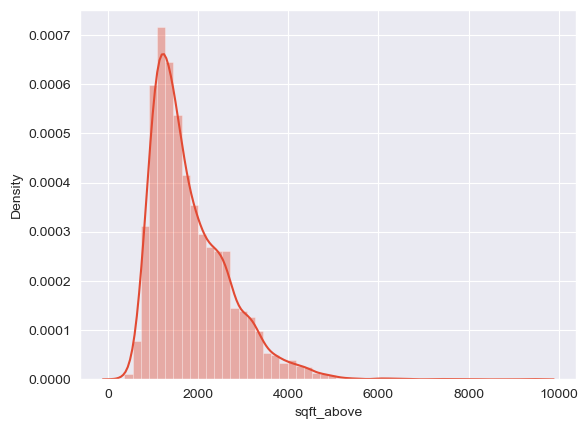

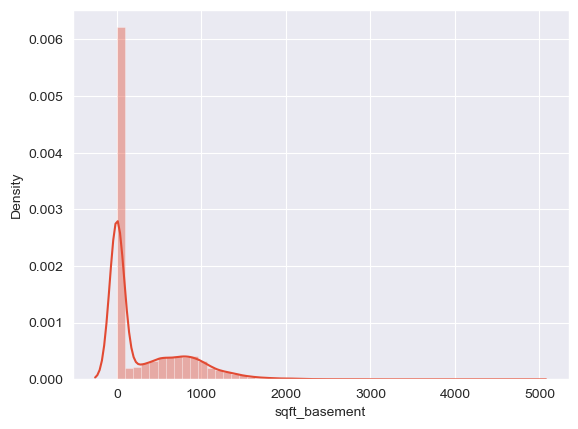

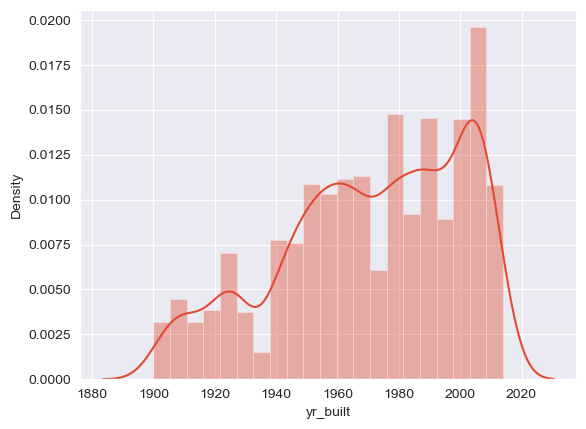

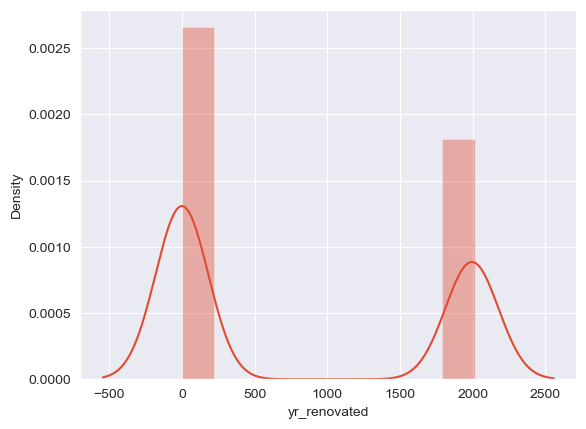

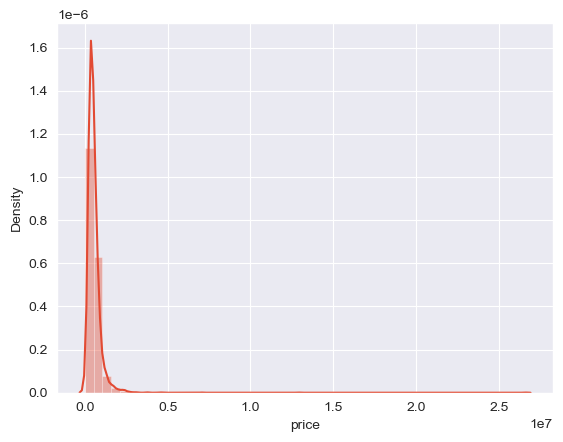

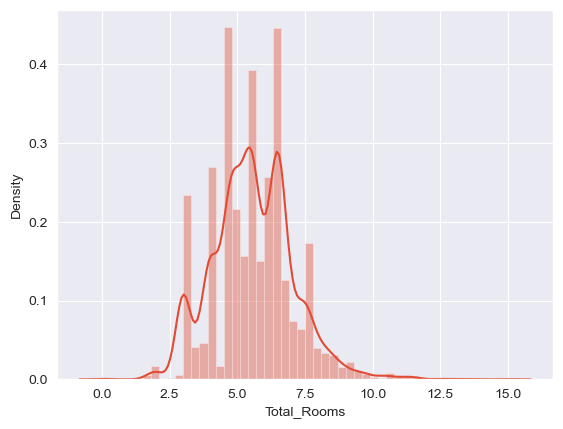

In [38]:
## Distribution
for i in num:
    sns.distplot(df[i])
    plt.show()

In [39]:
df = shuffle(df)
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price,Total_Rooms
944,5/20/2014 0:00,2,1.00,860,8308,1.0,0,0,4,860,0,1948,0,3522 SW 107th St,Seattle,WA 98146,USA,330000.0,3.00
2699,6/17/2014 0:00,3,2.25,2880,7599,1.0,0,2,3,1710,1170,1958,2002,1806 10th Pl W,Kirkland,WA 98033,USA,1538000.0,5.25
2793,6/18/2014 0:00,3,1.75,1050,6150,1.5,0,0,4,950,100,1928,0,3617 48th Ave SW,Seattle,WA 98116,USA,400000.0,4.75
3350,6/25/2014 0:00,2,1.00,2060,8398,1.0,0,0,3,1260,800,1962,2003,10447 8th Ave S,Seattle,WA 98168,USA,270000.0,3.00
3584,6/27/2014 0:00,2,0.75,840,40642,1.0,1,4,4,840,0,1937,0,8907 SW Quartermaster Dr,Vashon,WA 98070,USA,528000.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,6/30/2014 0:00,3,2.25,2310,7200,2.0,0,0,3,2310,0,1990,2009,11103 SE 219th Pl,Kent,WA 98031,USA,327500.0,5.25
458,5/9/2014 0:00,4,2.50,2840,4500,2.0,0,0,3,2840,0,2012,1912,19226 76th Pl NE,Kenmore,WA 98028,USA,557000.0,6.50
4449,6/3/2014 0:00,4,2.25,2290,5350,2.0,0,0,4,2120,170,1958,1972,2523 42nd Ave W,Seattle,WA 98199,USA,535000.0,6.25
3809,7/2/2014 0:00,5,2.25,2900,10300,1.0,0,0,3,1450,1450,1985,0,14301-14399 SE 63rd St,Bellevue,WA 98006,USA,675000.0,7.25


In [55]:
X = df.drop(columns=["price"] , axis=1)
y = df["price"]

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=123)

print("X_train == " , X_train.shape)
print("X_test  == " , X_test.shape)
print("y_train == " , y_train.shape)
print("y_test == " , y_test.shape)

X_train ==  (3680, 18)
X_test  ==  (920, 18)
y_train ==  (3680,)
y_test ==  (920,)


In [57]:
numeric_cols = [col for col in X.columns if X[col].dtype in ["int32" , "int64" , "float32" , "float64"]]
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'Total_Rooms']

In [58]:
categorical_cols = [col for col in X.columns if X[col].dtype == object]
categorical_cols

['date', 'street', 'city', 'statezip', 'country']

In [59]:
# numerical pipeline to solve the nan and make Standardization
num_pipeline = Pipeline(steps=[
                            ("selector", DataFrameSelector(numeric_cols)), # ==> To select the numeric cols from the Data
                            ("Imputer", SimpleImputer(strategy="median") ),
                            ("Scaler", StandardScaler())
                                ])


# categorical pipeline 
cate_pipeline = Pipeline(steps=[
                 ("selector", DataFrameSelector(categorical_cols)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("one_hot", LabelEncoder())
                ])

In [60]:
def Preprocessing(numeric_cols, categorical_cols, X_train, X_test):
    if numeric_cols and categorical_cols:
        # total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                                        ("cate_pipeline", cate_pipeline)])

        # make fitting
        num_pipeline.fit(X_train)
        X_train_final= num_pipeline.transform(X_train)
        X_test_final =  num_pipeline.transform(X_test)

        return X_train_final, X_test_final

    elif categorical_cols == [] and numeric_cols:
        # make fitting
        num_pipeline.fit(X_train)
        X_train_final= num_pipeline.transform(X_train)
        X_test_final =  num_pipeline.transform(X_test)

        return X_train_final, X_test_final

    else:
        # make fitting
        num_pipeline.fit(X_train)
        X_train_final= num_pipeline.transform(X_train)
        X_test_final =  num_pipeline.transform(X_test)

        return X_train_final, X_test_final



X_train_final, X_test_final = Preprocessing(numeric_cols, categorical_cols, X_train, X_test)
print(f"X_train_final is = {X_train_final}")
print("*"*50)
print(f"X_test_final is = {X_test_final}")


X_train_final is = [[-0.17110388  0.21301727 -1.04551617 ... -0.98188439 -0.82623857
  -0.02947675]
 [ 0.87806633  0.73426111  0.17079132 ...  1.20317417 -0.82623857
   0.82308533]
 [ 0.41975814  1.56687607  1.66383073 ... -1.46207824 -0.82623857
   1.00446588]
 ...
 [ 0.41975814  0.40391731  0.84525941 ...  1.10389313  1.21060639
   0.40281043]
 [ 0.41975814  0.40391731  0.24766677 ...  0.3042526  -0.82623857
   0.40281043]
 [ 0.87806633  1.25550496  1.9102569  ...  1.17009699 -0.82623857
   1.06148547]]
**************************************************
X_test_final is = [[ 0.41975814 -0.24233296  0.03284029 ... -0.77714584  1.21000607
   0.15465575]
 [-0.17110388  0.87928846 -0.57163779 ...  1.13700331 -0.82623857
   0.32342528]
 [-0.17110388 -0.24233296  0.04465135 ... -1.08449099  1.21013994
  -0.23205185]
 ...
 [-0.17110388  0.40391731  0.26917602 ... -0.50513988  1.21053996
   0.06468264]
 [-0.17110388 -0.24233296  0.03284029 ... -0.64100351 -0.82623857
  -0.23205185]
 [ 0.87806

# Solve skewed By log Transform

In [61]:
cols = [col for col in df.columns]
cols

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country',
 'price',
 'Total_Rooms']

In [62]:
cols = [col for col in df.columns if df[col].dtype != "object"]
for col in cols:
    df[col] = np.log(df[col] + 1e-10)

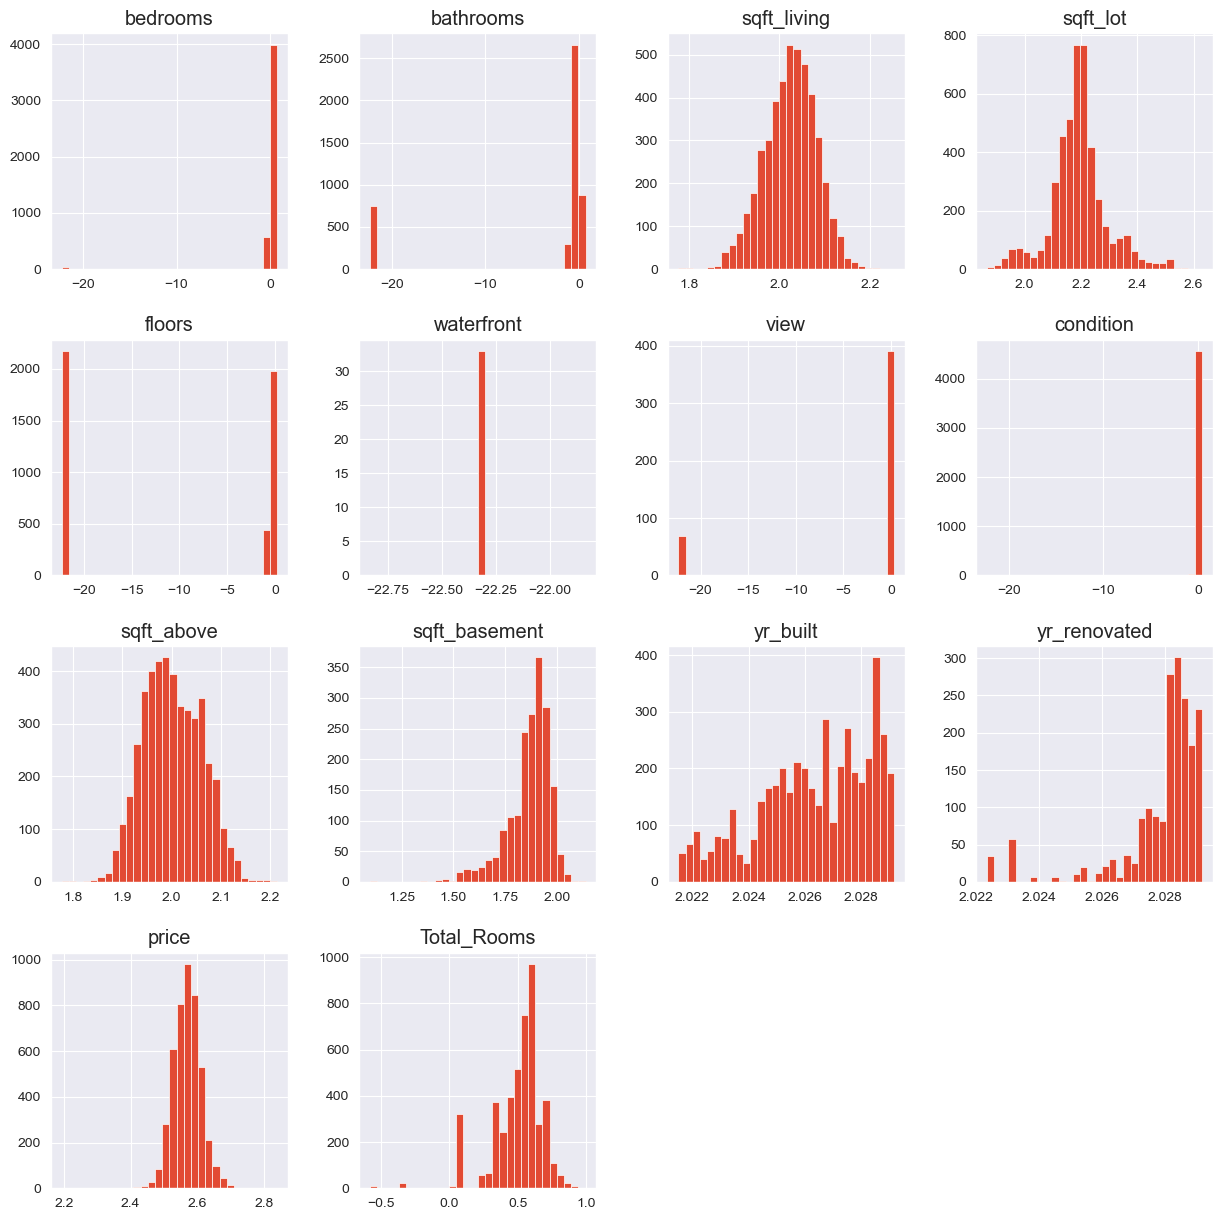

In [63]:
df.hist(bins=30 , figsize=(15,15))
plt.show()

# Model ML

# RandomForestRegressor

In [64]:
Random = RandomForestRegressor()

param = {
    "criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth" : [col for col in range(3,15,3)],
    "n_estimators" : [col for col in range(100,500,100)],
#     "min_samples_split" : [col for col in range(2,10,2)],
#     "min_samples_leaf" : [col for col in range(2,10,3)]
}

grid_search = GridSearchCV(estimator=Random  ,param_grid=param , n_jobs=-1 , cv=5 , scoring="neg_mean_squared_error")
 
grid_search.fit(X_train_final , y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [65]:
print(f"Best Parameter is \n {grid_search.best_params_}")

Best Parameter is 
 {'criterion': 'absolute_error', 'max_depth': 3, 'n_estimators': 100}


In [71]:
Rand_reg = grid_search.best_estimator_
Rand_reg

RandomForestRegressor(criterion='absolute_error', max_depth=3)

In [69]:
cross_val = cross_val_score(estimator=Rand_reg , X=X_train_final , y=y_train ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val))

print("cross val score mean is ==>> ",cross_val.mean() * -1)

Score is ==>>
  [11.80417479 12.67656457 19.91426822 19.79607342 10.9930363 ]
cross val score mean is ==>>  15.036823459859857


In [104]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=Rand_reg, X=X_train_final, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)

# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cross_val_pred))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 3.8751


In [74]:
X.shape

(4600, 18)

In [76]:
len(numeric_cols)

13

In [77]:
feat_import_forst = {}
for name , score in zip(numeric_cols , Rand_reg.feature_importances_[:17]):
    feat_import_forst[name] = score


In [79]:
keys_forst = feat_import_forst.keys()
values_forst = feat_import_forst.values()

In [90]:
pd.DataFrame({"features" : keys_forst , "Scores" : values_forst})


,features,Scores
0,bedrooms,0.000673
1,bathrooms,0.006185
2,sqft_living,0.823511
3,sqft_lot,0.059976
4,floors,0.000000
5,waterfront,0.000811
6,view,0.008392
7,condition,0.000697
8,sqft_above,0.036040
9,sqft_basement,0.000220


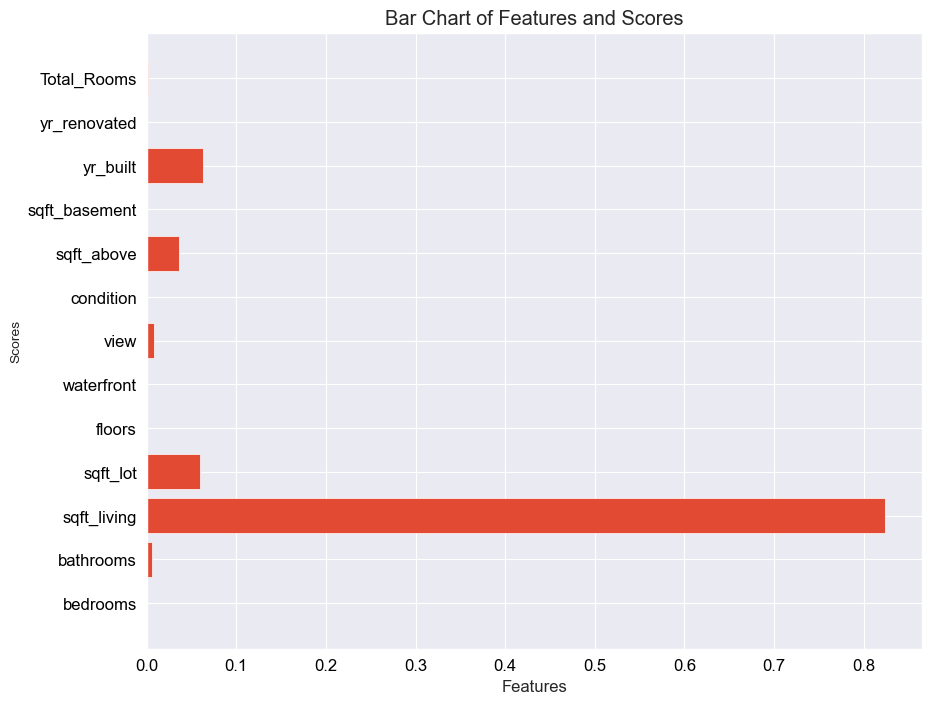

In [96]:
plt.figure(figsize=(10,8))
plt.barh(x["features"], x["Scores"])
plt.xlabel("Features" , fontsize=12)
plt.ylabel("Scores")
plt.title("Bar Chart of Features and Scores")
plt.xticks(c="k" , fontsize=12)
plt.yticks(c="k" , fontsize=12)
plt.grid(True)
plt.show()


## xgboost

In [127]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_final , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [128]:
cross_val_xgb = cross_val_score(estimator=xgb_reg , X=X_train_final , y=y_train ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val_xgb))

print("cross val score mean is ==>> ",cross_val_xgb.mean() * -1)

Score is ==>>
  [19.38180506 20.72750293 24.47878524 23.8046466  14.33201951]
cross val score mean is ==>>  20.544951865462444


In [129]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)



# Calculate mean squared error
mse =np.sqrt(mean_squared_error(y_train, cross_val_pred))
# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 4.5327


In [130]:
param_xgb = {
    "n_estimators":[col for col in range(100,200,50)],
    "learning_rate" : [0.1,0.2,0.3],
    "max_depth" : [col for col in range(6,15,2)],
    "subsample" : [0.8,0.9]
}

grid_xgb = GridSearchCV(estimator=xgb_reg , param_grid=param_xgb , n_jobs=-1 ,
                        verbose=6 , cv=5 , scoring="neg_mean_squared_error")
grid_xgb.fit(X_train_final , y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [6, 8, 10, 12, 14],
                         'n_estimators': [100, 150], 'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [131]:
pest_para = grid_xgb.best_params_
pest_para

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

In [132]:
best_est = grid_xgb.best_estimator_
best_est

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [138]:
cross_val_xgb_sc = cross_val_score(estimator=grid_xgb , X=X_train_final , y=y_train ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val_xgb_sc))

print("cross val score mean is ==>> ",cross_val_xgb_sc.mean() * -1)

Score is ==>>
  [17.69886534 16.91123324 22.96321944 21.39263617 14.73558056]
cross val score mean is ==>>  18.740306949508227


In [139]:
# Make cross-validation predictions
cross_val_pred_xgb = cross_val_predict(estimator=grid_xgb, X=X_train_final, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)

# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cross_val_pred_xgb))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 4.3290


In [135]:
feat_import_forst = {}
for name , score in zip(numeric_cols , best_est.feature_importances_[:17]):
    feat_import_forst[name] = score

    
keys_forst = feat_import_forst.keys()
values_forst = feat_import_forst.values()

 pd.DataFrame({"features" : keys_forst , "Scores" : values_forst})


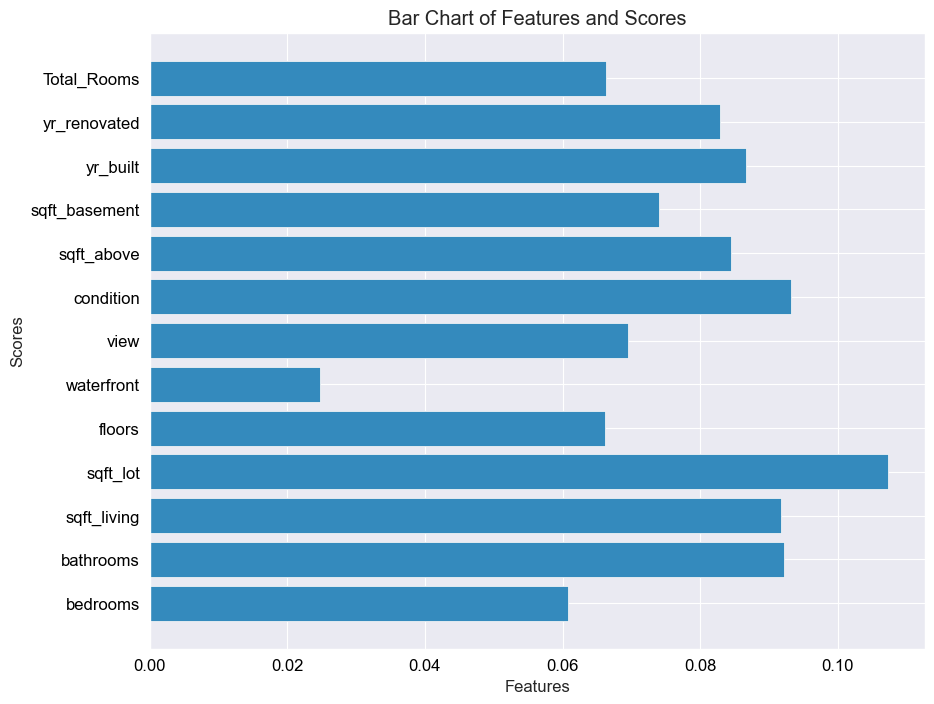

In [137]:
plt.figure(figsize=(10,8))
x = pd.DataFrame({"features": keys_forst, "Scores": values_forst})
plt.barh(y=x["features"], width=x["Scores"])  

plt.barh(y=x["features"], width=x["Scores"])  
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scores" , fontsize=12)
plt.title("Bar Chart of Features and Scores")
plt.xticks(c="k", fontsize=12)
plt.yticks(c="k", fontsize=12)
plt.grid(True)
plt.show()


# End